In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Why defining random seed?

In [2]:
np.random.seed(seed=25)

## Non-Linear Data

In [3]:
data = pd.read_csv('winequality-white.csv', sep=';')
print(data.shape)
print(data.isnull().sum())
data.head()

(4898, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df = data.copy() 

# Residual Plots

Checking linearity against dependent variables

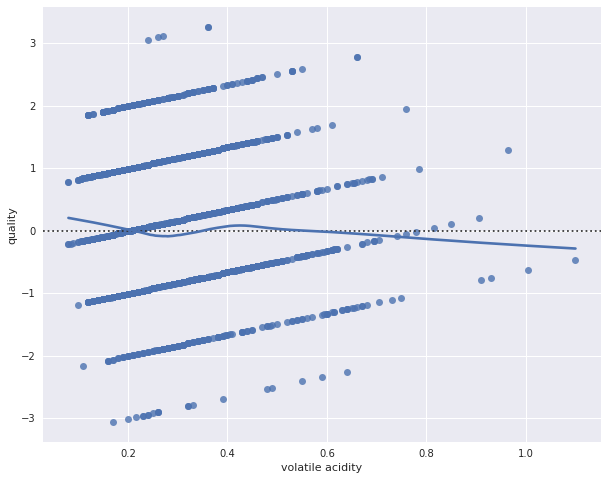

In [5]:
plt.figure(figsize=(10,8))
sns.residplot(y='quality',x='volatile acidity',data=df,lowess=True)

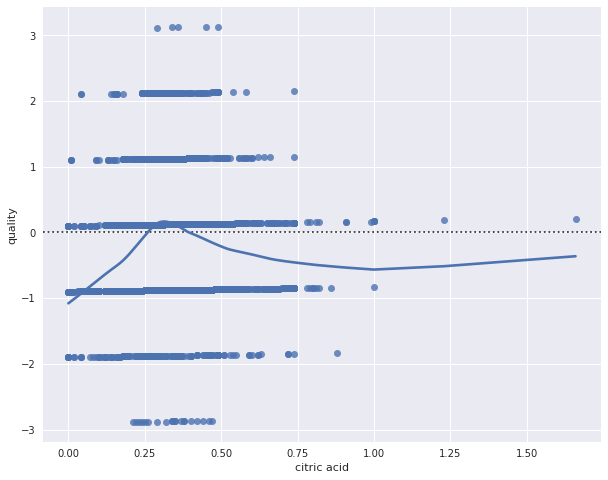

In [6]:
plt.figure(figsize=(10,8))
sns.residplot(y='quality',x='citric acid',data=df,lowess=True)

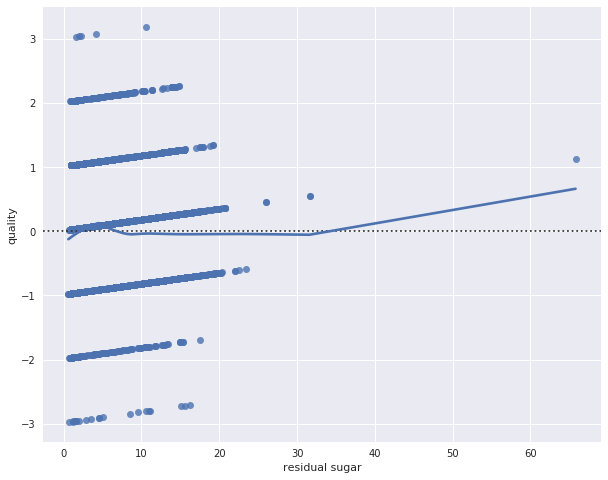

In [7]:
plt.figure(figsize=(10,8))

sns.residplot(y='quality',x='residual sugar',data=df,lowess=True)

### Creating Independent and Dependent Variables

In [8]:
X = df.drop('quality', axis=1)
Y = df[['quality']]
print(X.shape, Y.shape)

(4898, 11) (4898, 1)


### Normalizing Data

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


### Splitting Data

In [10]:
xtrain ,xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3428, 11) (3428, 1)
(1470, 11) (1470, 1)


### Applying Linear Regression

In [11]:
model = LinearRegression(fit_intercept=True, n_jobs =1)

In [12]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_

array([[ 0.04811472, -0.18483027,  0.00933174,  0.41558739, -0.0170498 ,
         0.04493431, -0.00452208, -0.44794699,  0.10733228,  0.05868255,
         0.23688335]])

In [14]:
pred = model.predict(xtest)

In [15]:
print(pred[:5])
print(ytest[:5])

[[5.98551239]
 [6.03466355]
 [5.14556403]
 [6.75687315]
 [5.33718688]]
[[8]
 [6]
 [5]
 [7]
 [5]]


In [16]:
r2_score(pred, ytest)

-1.6253854673816455

### Summary Statistics of non-Linear data

In [17]:
import statsmodels.api as sm

x = xtrain
y = ytrain

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 11 Oct 2018   Prob (F-statistic):          4.11e-238
Time:                        19:50:27   Log-Likelihood:                -3872.1
No. Observations:                3428   AIC:                             7768.
Df Residuals:                    3416   BIC:                             7842.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8721      0.013    458.140      0.0

## Linear Data

In [18]:
data = pd.read_csv('kc_house_data.csv')
df = data.copy()
print(df.shape)
print(df.isnull().sum())
df.head()

(21613, 21)
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Residual Plots
Checking the linearity of the data

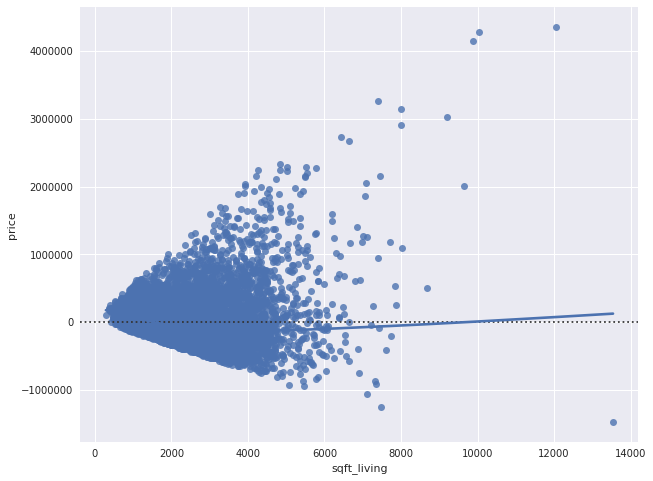

In [19]:
plt.figure(figsize=(10,8))

sns.residplot(x='sqft_living',y='price',data=df,lowess=True);

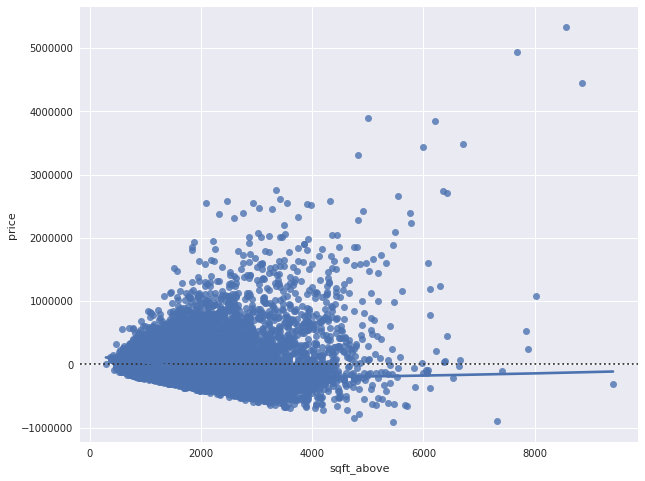

In [20]:
plt.figure(figsize=(10,8))

sns.residplot(x='sqft_above',y='price',data=df,lowess=True);

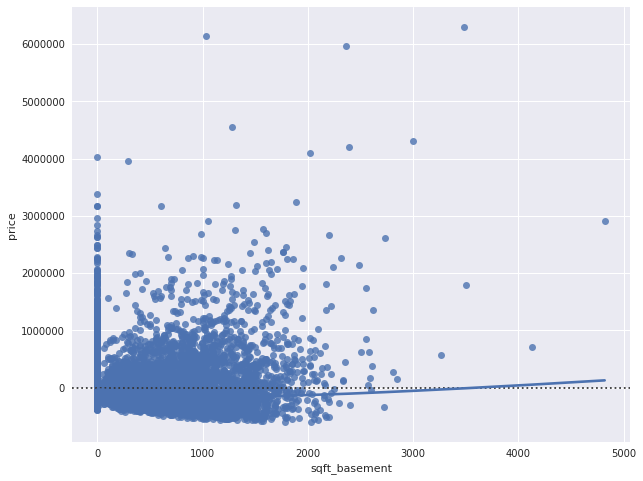

In [21]:
plt.figure(figsize=(10,8))
sns.residplot(x='sqft_basement',y='price',data=df,lowess=True);

### Creating Independent and Dependent Variables

In [22]:
X1 = df.drop(['id', 'date', 'price'], axis=1)
Y1 = df[['price']]
print(X1.shape)
print(Y1.shape)

(21613, 18)
(21613, 1)


In [23]:
X1.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Normalization

In [24]:
scaler = StandardScaler().fit(X1)
X_ = scaler.transform(X1)
X1 = pd.DataFrame(data=X_, columns = X1.columns)
frw_sel=X1.copy()
X1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


### Train Test Splitting

In [25]:
xtrain ,xtest, ytrain, ytest = train_test_split(X1.values, Y1.values, test_size=0.30)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(15129, 18) (15129, 1)
(6484, 18) (6484, 1)


### Training Model, Predicting & Testing

In [26]:
model = LinearRegression(fit_intercept=True, n_jobs =1).fit(xtrain, ytrain)

In [27]:
pred = model.predict(xtest)

In [28]:
print(pred[:5])
print(ytest[:5])

[[436164.34841026]
 [474849.82250211]
 [261159.79006888]
 [425557.82245914]
 [215497.47088117]]
[[531800.]
 [415000.]
 [199950.]
 [425000.]
 [264950.]]


**Checking r2 by sklearn metric**

In [29]:
r2_score(ytest,pred)

0.6819326660094427

### SSR, SSE, R2, Adjusted R2 Calculation

In [30]:
sse = np.sum((pred - ytest)**2)
sse

278287916998033.3

In [31]:
ssr = np.sum((pred - ytest.mean())**2)
ssr

609854974974174.9

In [32]:
sst = ssr + sse
sst

888142891972208.2

In [33]:
r2 = ssr/sst
r2

0.6866631264930041

In [34]:
n = len(ytest)
k = xtest.shape[-1]
adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
adj_r2

0.6857907268451888

## Summary Statistics

In [35]:
import statsmodels.api as sm

xt = xtrain
yt = ytrain

X2 = sm.add_constant(xt)
est = sm.OLS(yt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2140.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:50:32   Log-Likelihood:            -2.0604e+05
No. Observations:               15129   AIC:                         4.121e+05
Df Residuals:                   15111   BIC:                         4.123e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.411e+05   1617.659    334.518      0.0

## Backward Elimination using p value

In [36]:
X=np.append(arr = np.ones((len(xt),1)).astype(int), values = xt, axis = 1)

In [37]:
xelimination = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
regressorOLS = sm.OLS(yt, xelimination).fit() #ordinary least squared method
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2140.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:50:32   Log-Likelihood:            -2.0604e+05
No. Observations:               15129   AIC:                         4.121e+05
Df Residuals:                   15111   BIC:                         4.123e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.411e+05   1617.659    334.518      0.000    5.38e+05    5.44e+05
x1         -3.247e+04   2047.443    -15.860      0.000   -3.65e+04   -2.85e+04
x2          3.126e+04   2950.802     10.593      0.000    2.55e+04     3.7e+04
x3          7.986e+04   1867.482     42.762      0.000    7.62e+04    8.35e+04
x4          9464.3938   2389.065      3.962      0.000    4781.537    1.41e+04
x5          6330.4038   2298.205      2.754      0.006    1825.645    1.08e+04
x6          5.783e+04   1768.702     32.697      0.000    5.44e+04    6.13e+04
x7          3.613e+04   1963.545     18.400      0.000    3.23e+04       4e+04
x8          1.753e+04   1811.928      9.674      0.000     1.4e+04    2.11e+04
x9          1.138e+05   2983.692     38.129      0.000    1.08e+05     1.2e+05
x10         7.311e+04   2002.072     36.515      0.000    6.92e+04     7.7e+04
x11         2.894e+04   1847.161     15.665      0.000    2.53e+04    3.26e+04
x12        -7.947e+04   2512.322    -31.631      0.000   -8.44e+04   -7.45e+04
x13         9754.4599   1733.090      5.628      0.000    6357.395    1.32e+04
x14        -3.334e+04   2084.589    -15.992      0.000   -3.74e+04   -2.92e+04
x15         8.316e+04   1749.086     47.544      0.000    7.97e+04    8.66e+04
x16        -2.807e+04   2160.267    -12.992      0.000   -3.23e+04   -2.38e+04
x17         1.708e+04   2782.097      6.139      0.000    1.16e+04    2.25e+04
x18        -1.257e+04   2386.419     -5.269      0.000   -1.73e+04   -7895.576
==============================================================================
Omnibus:                    12582.751   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1219774.987
Skew:                           3.443   Prob(JB):                         0.00
Kurtosis:                      46.446   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
xelimination = X[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]]
regressorOLS = sm.OLS(yt, xelimination).fit() #ordinary least squared method
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2273.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:50:32   Log-Likelihood:            -2.0605e+05
No. Observations:               15129   AIC:                         4.121e+05
Df Residuals:                   15112   BIC:                         4.123e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.411e+05   1618.012    334.446      0.000    5.38e+05    5.44e+05
x1         -3.261e+04   2047.269    -15.929      0.000   -3.66e+04   -2.86e+04
x2          3.338e+04   2848.778     11.719      0.000    2.78e+04     3.9e+04
x3           8.01e+04   1865.884     42.927      0.000    7.64e+04    8.38e+04
x4          9276.7629   2388.614      3.884      0.000    4594.790     1.4e+04
x5          5.781e+04   1769.073     32.680      0.000    5.43e+04    6.13e+04
x6          3.627e+04   1963.275     18.476      0.000    3.24e+04    4.01e+04
x7          1.726e+04   1809.653      9.537      0.000    1.37e+04    2.08e+04
x8          1.145e+05   2973.533     38.494      0.000    1.09e+05     1.2e+05
x9          7.448e+04   1939.444     38.402      0.000    7.07e+04    7.83e+04
x10         2.686e+04   1686.976     15.923      0.000    2.36e+04    3.02e+04
x11        -7.802e+04   2457.323    -31.750      0.000   -8.28e+04   -7.32e+04
x12         9984.0465   1731.461      5.766      0.000    6590.173    1.34e+04
x13         -3.28e+04   2076.112    -15.801      0.000   -3.69e+04   -2.87e+04
x14         8.353e+04   1744.211     47.891      0.000    8.01e+04     8.7e+04
x15        -2.859e+04   2152.465    -13.280      0.000   -3.28e+04   -2.44e+04
x16          1.63e+04   2768.219      5.887      0.000    1.09e+04    2.17e+04
x17        -1.279e+04   2385.693     -5.359      0.000   -1.75e+04   -8109.433
==============================================================================
Omnibus:                    12538.986   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1206123.198
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      46.202   Cond. No.                     1.67e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Forward Selection usuing R squared method

In [39]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(15129, 18) (15129, 1)
(6484, 18) (6484, 1)


**Converting array to dataframe**

In [40]:
x_train=pd.DataFrame(data=xtrain, columns=X1.columns)
x_test=pd.DataFrame(data=xtest, columns=X1.columns)
y_train=pd.DataFrame(data=ytrain, columns=Y1.columns)
y_test=pd.DataFrame(data=ytest, columns=Y1.columns)

**Defining Model**

In [41]:
model = LinearRegression(fit_intercept=True, n_jobs =1)

In [42]:
tem={}
for i in x_train.columns:
    model.fit(x_train[[i]],y_train)
    pred = model.predict(x_test[[i]])
    tem[i]=r2_score(y_test,pred)


import operator
sorted_x = sorted(tem.items(), key=operator.itemgetter(1)) 

final_var={}

final_var[sorted_x[-1][0]]=sorted_x[-1][1]

while (True):
    prev=sorted_x[-1][1]
    tem={}
    lis=list(final_var.keys())
    for j in x_train.columns:
        if j in lis:
            co=1
        else:
            lis.append(j)
            model.fit(x_train[lis],y_train)
            pred = model.predict(x_test[lis])
            tem[j]=r2_score(y_test,pred)
            #print(lis,r2_score(ytest,pred))
            lis.remove(j)
    sorted_x = sorted(tem.items(), key=operator.itemgetter(1))
    current=sorted_x[-1][1]
    if current>=prev:
        final_var[sorted_x[-1][0]]=sorted_x[-1][1]
        #print(prev,current)
    else:
        break
    

In [43]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
lis

['sqft_living',
 'lat',
 'view',
 'grade',
 'yr_built',
 'waterfront',
 'bedrooms',
 'bathrooms',
 'condition',
 'long',
 'zipcode',
 'sqft_basement',
 'sqft_lot15',
 'sqft_living15',
 'sqft_above']

In [45]:
model.fit(x_train[lis],y_train)
pred = model.predict(x_test[lis])
r2_score(y_test, pred)

0.6829630323923921

### KFold

**Diagram of 5-fold cross-validation**<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/07_cross_validation_diagram.png' width=200, height=400 >

In [46]:
from sklearn.model_selection import KFold

In [47]:
folds = KFold(n_splits=4, shuffle=True, random_state=25)

In [48]:
for x, y in folds.split(X1, Y1):
    print(x[:],len(x))
    print(y[:],len(y))

[    0     4     7 ... 21610 21611 21612] 16209
[    1     2     3 ... 21594 21605 21608] 5404
[    0     1     2 ... 21608 21609 21610] 16210
[    4    16    21 ... 21607 21611 21612] 5403
[    1     2     3 ... 21610 21611 21612] 16210
[    0     9    17 ... 21587 21600 21604] 5403
[    0     1     2 ... 21608 21611 21612] 16210
[    7    13    14 ... 21602 21609 21610] 5403


### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
model = LinearRegression(fit_intercept=True, n_jobs =1)

In [51]:
scores = cross_val_score(model, xtrain, ytrain, cv=10)

In [52]:
print(scores)

[0.70897734 0.69789927 0.72491176 0.6753178  0.68118381 0.73691543
 0.71260272 0.68948064 0.68232336 0.74851672]


In [53]:
print(scores.mean())

0.7058128860720561
